In [2]:
import os

# Set the GPU you want to use (e.g., GPU 0)
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

                
                

In [2]:
# !pip install roboflow --user

In [3]:
import torch
print(torch.__version__)

2.5.1+cu121


In [ ]:
import torch
from ultralytics import YOLO
import cv2


# Load the YOLOv8 model
model = YOLO('yolo11n.pt')  # yolov8n.pt is a lightweight model; you can replace it with yolov8s.pt, yolov8m.pt, etc.

# Set device to GPU if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

# # Train the model
history1=model.train(
    data='C:/Users/m2.tb/Desktop/portfolio/anomaly detection fabric/D-4/data.yaml', # Path to the dataset configuration file
    epochs=500,  # Number of epochs for training
    imgsz=640,  # Image size
    batch=8,  # Batch size, adjust based on GPU memory
    workers=4,  # Number of workers for data loading
    device=device,  # Device to use (GPU or CPU)
    name='yolo11',  # Name of the training run
    optimizer='Adam',  # Optimizer type, can be SGD or Adam
    lr0=0.001,  # Initial learning rate
    weight_decay=5e-4,  # Weight decay for regularization
    patience=10  # Early stopping patience
)

# Validate the model after training
# metrics = model.val()
# print(metrics)  # Outputs evaluation metrics such as mAP, precision, recall

# Save the trained model
# model.save('brain_tumor_detection_final.pt')



Ultralytics 8.3.39  Python-3.10.15 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12288MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=C:/Users/m2.tb/Desktop/portfolio/anomaly detection fabric/D-4/data.yaml, epochs=500, time=None, patience=10, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=4, project=None, name=yolo11, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,

train: Scanning C:\Users\m2.tb\Desktop\portfolio\anomaly detection fabric\D-4\train\labels.cache... 1267 images, 13 backgrounds, 0 corrupt: 100%|██████████| 1267/1267 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 1011, len(boxes) = 1534. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\m2.tb\Desktop\portfolio\anomaly detection fabric\D-4\valid\labels.cache... 317 images, 5 backgrounds, 0 corrupt: 100%|██████████| 317/317 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 258, len(boxes) = 389. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs\detect\yolo11\labels.jpg... 


In [ ]:
model.export(format='pt', path='C:/Users/m2.tb/Desktop/portfolio/license plate recognition/yolo11_1.pt')  # Save the model in PyTorch format



image 1/1 C:\Users\m2.tb\Desktop\portfolio\license plate recognition\License-Plate-Recognition-6\1.jpg: 480x640 2 License_Plates, 86.0ms
Speed: 2.0ms preprocess, 86.0ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)


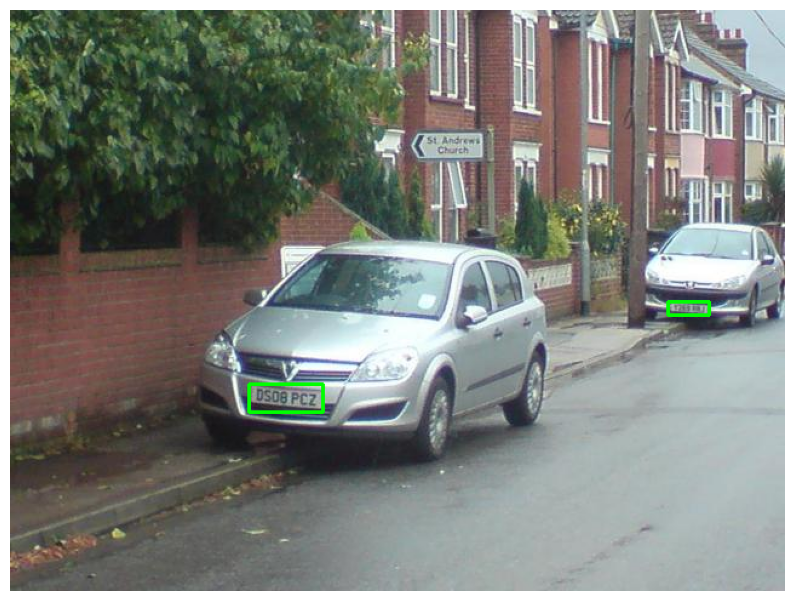

In [2]:
import cv2
import matplotlib.pyplot as plt
import torch
from ultralytics import YOLO
import cv2
%matplotlib inline

results = model('C:/Users/m2.tb/Desktop/portfolio/license plate recognition/License-Plate-Recognition-6/1.jpg')  # Replace with your test image path

for result in results:
    img = result.orig_img  # Get the original image with results
    for box in result.boxes.xyxy:  # Loop through detected bounding boxes
        x1, y1, x2, y2 = map(int, box[:4])
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box
    plt.figure(figsize=(10, 10))  # Adjust the size as needed
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()